<a href="https://colab.research.google.com/github/Hami-611/21Days_AI-ML_Challenge/blob/main/Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [2]:
netflix_df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.shape

(7787, 12)

In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


Data Cleaning

In [6]:
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [7]:
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [8]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [9]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [10]:
netflix_df['date_added']

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


In [11]:
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [12]:
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [13]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [14]:
netflix_df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


EDA

#### what is the distribution of content type?

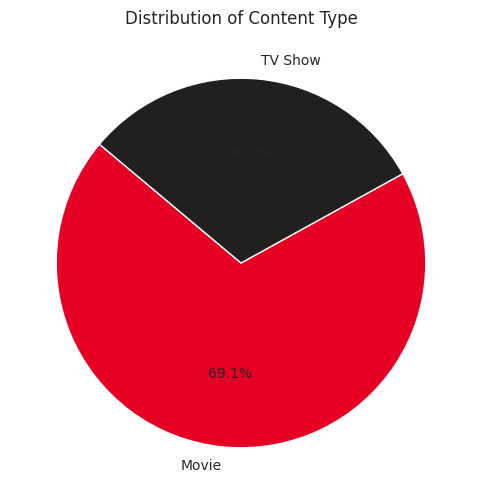

In [15]:
plt.figure(figsize=(8,6))
type_counts = netflix_df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#e60023','#221f1f'])
plt.title('Distribution of Content Type')
plt.show()

#### How content has been added over time?

<Axes: xlabel='year_added'>

<Figure size 1200x600 with 0 Axes>

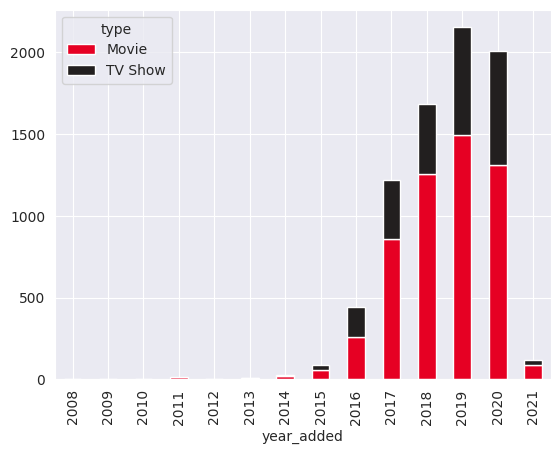

In [16]:
content_added_over_time = netflix_df.groupby(['year_added','type']).size().unstack().fillna(0)
plt.figure(figsize=(12,6))
content_added_over_time.plot(kind='bar', stacked=True, color=['#e60023','#221f1f'])

#### What is the most popular genres?

In [17]:
genres = netflix_df.assign(genre=netflix_df['listed_in'].str.split(',')).explode('genre')


In [18]:
top_genres_count = genres['genre'].value_counts().reset_index()
top_genres_count.columns = ['genre','count']

/tmp/ipython-input-3702261593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_genre, x='genre', y='count', palette='viridis')


<Axes: xlabel='genre', ylabel='count'>

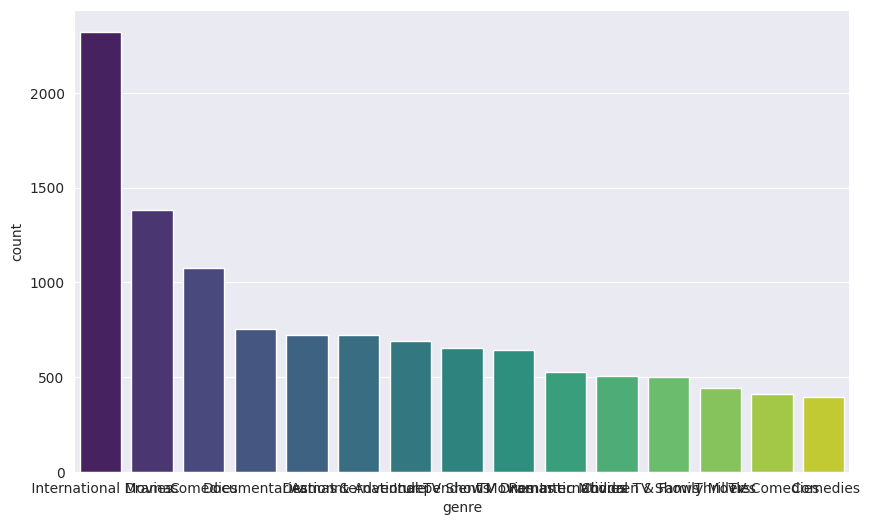

In [19]:
top_15_genre = top_genres_count.head(15)
plt.figure(figsize=(10,6))
sns.barplot(data=top_15_genre, x='genre', y='count', palette='viridis')
# plt.xticks(rotation=10)

#### What is the distribution of content duration?

In [20]:
movies_df = netflix_df[netflix_df['type'] == 'Movie'].copy()
tv_shows_df = netflix_df[netflix_df['type'] == 'TV Show'].copy()

In [21]:
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(int)
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3328911835.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(int)


/tmp/ipython-input-3073767429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tv_shows_df, x='seasons', ax=axes[1], palette='viridis')


<Axes: xlabel='seasons', ylabel='count'>

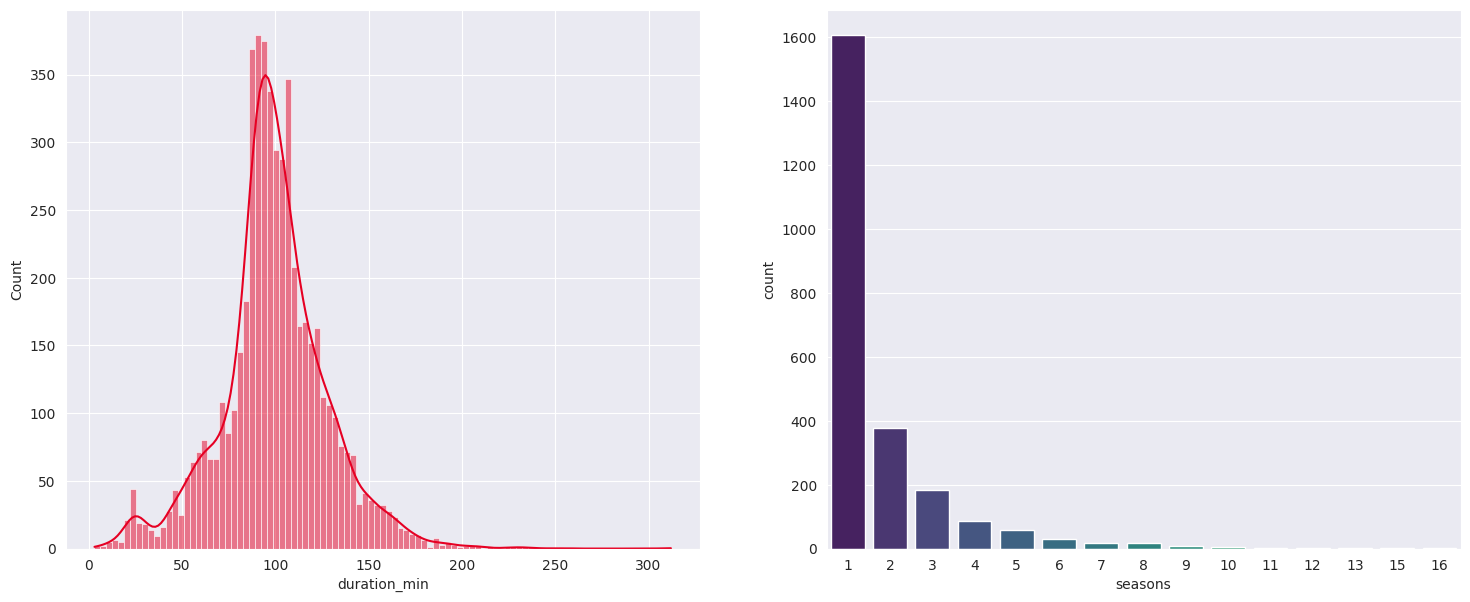

In [22]:
fig, axes = plt.subplots(1,2, figsize=(18,7))
sns.histplot(movies_df['duration_min'], kde=True, ax=axes[0], color='#e60023')
sns.countplot(data=tv_shows_df, x='seasons', ax=axes[1], palette='viridis')


#### Where does the content come from?

In [23]:
countries = netflix_df.assign(country=netflix_df['country'].str.split(', ')).explode('country')

In [24]:
top_15_countries = countries['country'].value_counts().reset_index()
top_15_countries.columns = ['country','count']

/tmp/ipython-input-2461517650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countires_plot, x='country', y='count', palette='viridis')


<Axes: xlabel='country', ylabel='count'>

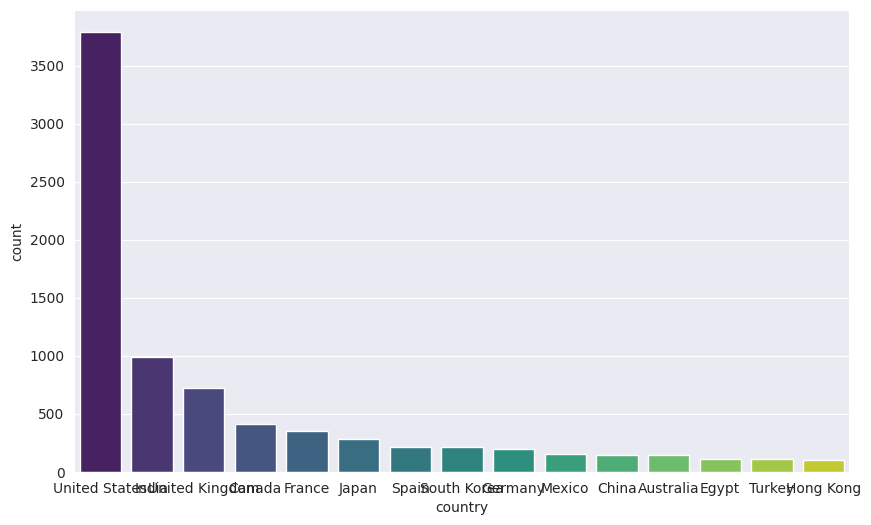

In [25]:
top_countires_plot = top_15_countries.head(15)
plt.figure(figsize=(10,6))
sns.barplot(data=top_countires_plot, x='country', y='count', palette='viridis')

#### What are the maturity ratings of the content?

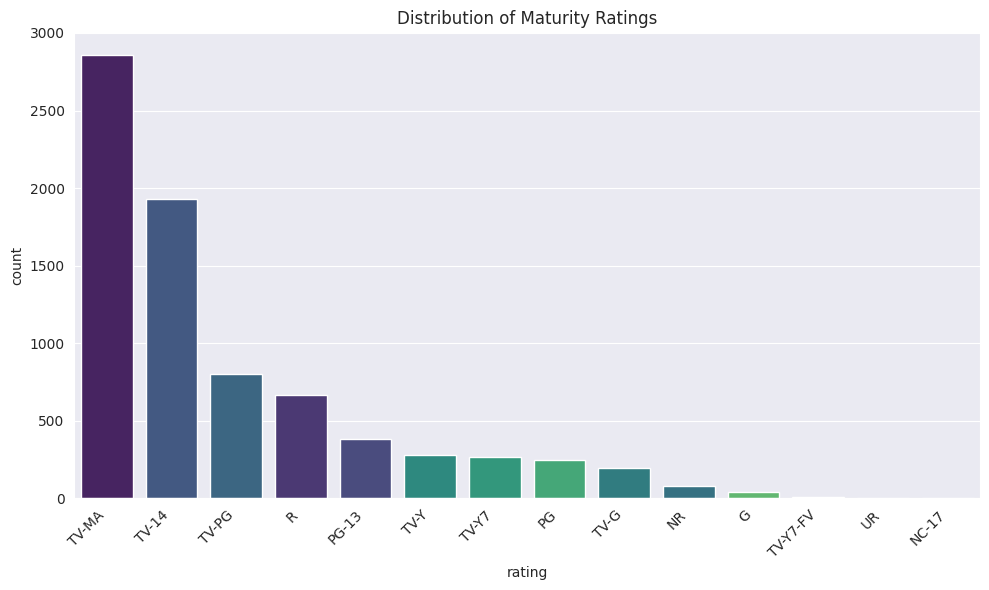

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=netflix_df, x='rating', order=netflix_df['rating'].value_counts().index, palette='viridis', hue='rating', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Maturity Ratings')
plt.tight_layout()
plt.show()

 Feature Engineering


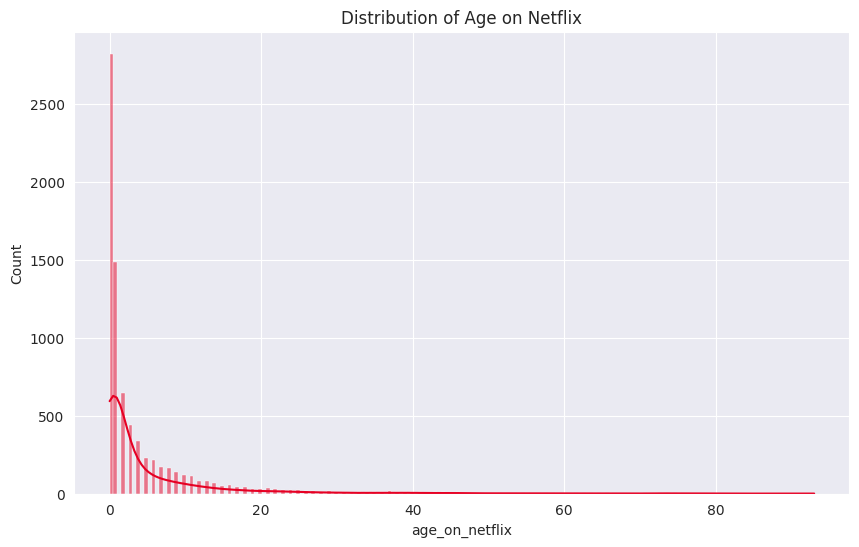

In [27]:
netflix_df['age_on_netflix'] = netflix_df['year_added'] - netflix_df['release_year']
content_age = netflix_df[netflix_df['age_on_netflix'] >= 0]
plt.figure(figsize=(10,6))
sns.histplot(data=content_age, x='age_on_netflix', kde=True, color='#e60023')
plt.title('Distribution of Age on Netflix')
plt.show()

Deeper Multivariate Ananlysis


In [28]:
top_genres = genres['genre'].value_counts().index[:5]
genres_movies =genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()

In [29]:
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '', regex=False).astype(int)

/tmp/ipython-input-1004998791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Dramas'),
  Text(1, 0, ' International Movies'),
  Text(2, 0, 'Documentaries'),
  Text(3, 0, 'Comedies'),
  Text(4, 0, ' Dramas')])

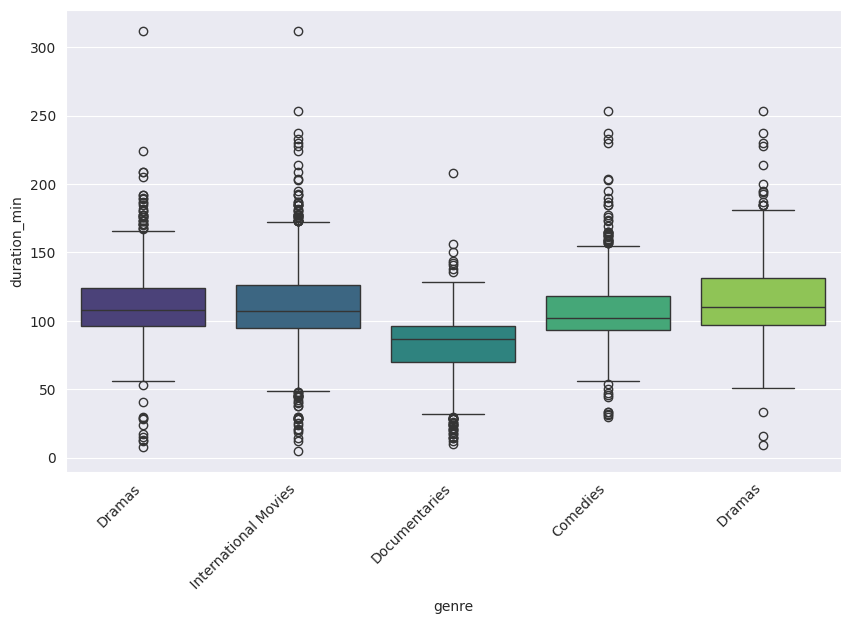

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='viridis')
plt.xticks(rotation=45, ha='right')

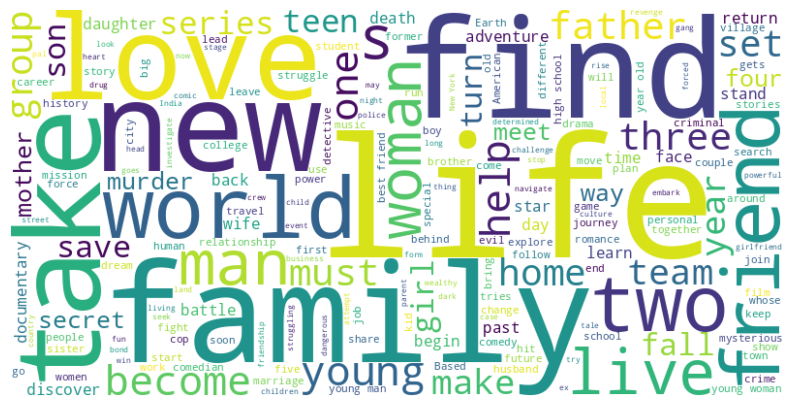

In [31]:
text = ' '.join(netflix_df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Assignment


1. How has the distribution of content ratings changed over time?

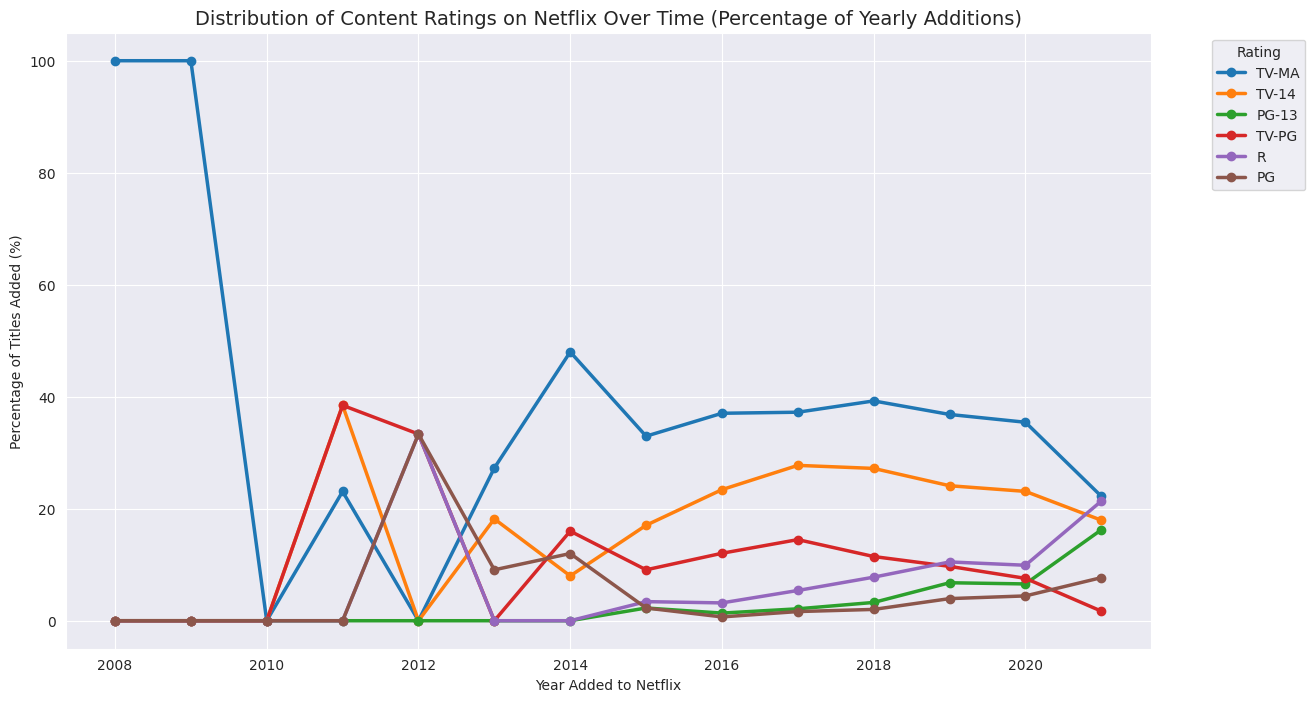

In [56]:
# 1. Create a pivot table to get counts per year and rating
rating_pivot = netflix_df.pivot_table(
    index='year_added',
    columns='rating',
    values='show_id',
    aggfunc='count',
    fill_value=0
)

# 2. Calculate the percentage contribution of each rating per year
rating_percentage = rating_pivot.div(rating_pivot.sum(axis=1), axis=0) * 100

# 3. Plot the trend of percentages
plt.figure(figsize=(14, 8))

# Plot only the most interesting ratings to avoid clutter
ratings_to_plot = ['TV-MA', 'TV-14', 'PG-13', 'TV-PG', 'R', 'PG']
for rating in ratings_to_plot:
    if rating in rating_percentage.columns: # Check if the rating exists in the data
        plt.plot(rating_percentage.index, rating_percentage[rating], marker='o', label=rating, linewidth=2.5)

plt.title('Distribution of Content Ratings on Netflix Over Time (Percentage of Yearly Additions)', fontsize=14)
plt.xlabel('Year Added to Netflix')
plt.ylabel('Percentage of Titles Added (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Rating')
plt.grid(True)
plt.show()

Insights & Explanation
The Rise of TV-MA: You will likely see a significant increase in the proportion of TV-MA content over time, especially post-2015. This coincides with Netflix's investment in mature, binge-worthy original series like House of Cards, Orange is the New Black, Bojack Horseman, and The Witcher, which are key drivers of subscriber growth.

Strategic Shift to Originals: The growth of TV-MA and TV-14 ratings mirrors Netflix's shift from licensing family-friendly content from other studios to producing its own edgier, more adult-oriented originals that they fully control.

Decline of Other Ratings: The proportion of content rated PG and G may have decreased relative to the total, indicating a strategic de-prioritization of young children's content in the main catalog (though it still exists in the Kids profile section).

Consistency of TV-14 & PG-13: These ratings likely remain consistently high, as they represent the broadest audience for mainstream Hollywood movies and popular teen dramas.


2. Is there a relationship between content age and its type (Movie vs. TV Show)?

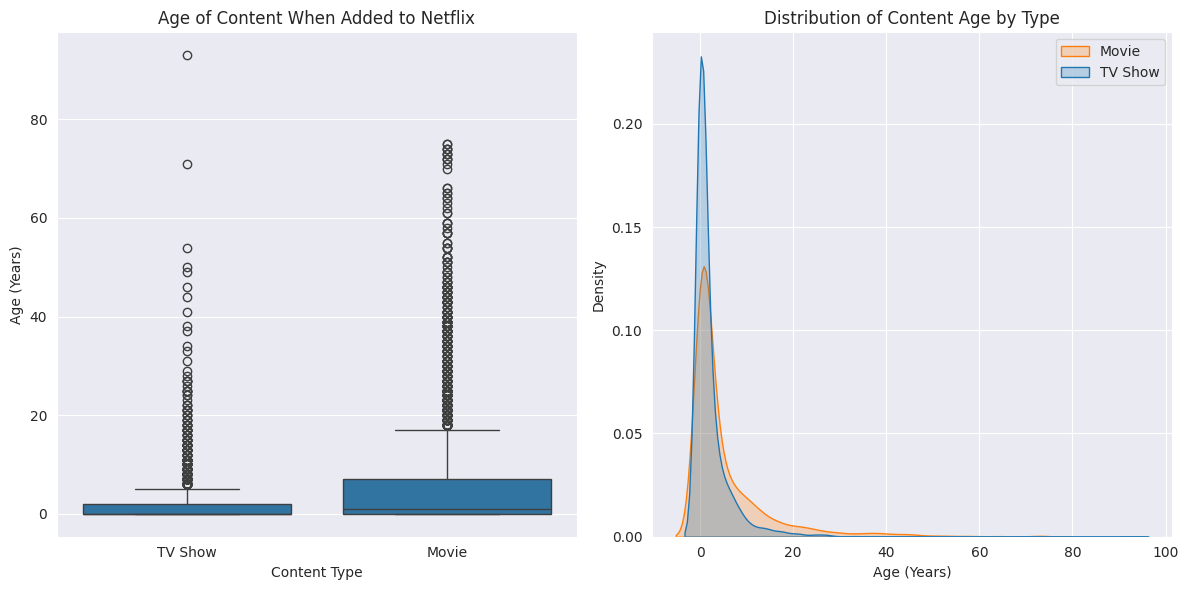

Summary Statistics for Content Age (in years):
          count      mean       std  min  25%  50%  75%   max
type                                                         
Movie    5370.0  5.565736  9.729067  0.0  0.0  1.0  7.0  75.0
TV Show  2388.0  2.326214  5.287340  0.0  0.0  0.0  2.0  93.0


In [37]:
# 1. Create a new feature: Content Age (when it was added - when it was released)
netflix_df['content_age'] = netflix_df['year_added'] - netflix_df['release_year']

# Filter out unrealistic ages (e.g., future releases or data errors) and focus on reasonable content
reasonable_age_df = netflix_df[(netflix_df['content_age'] >= 0) & (netflix_df['content_age'] < 100)]

# 2. Plot the distribution using a boxplot and KDE
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='type', y='content_age', data=reasonable_age_df)
plt.title('Age of Content When Added to Netflix')
plt.xlabel('Content Type')
plt.ylabel('Age (Years)')

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=reasonable_age_df, x='content_age', hue='type', common_norm=False, fill=True)
plt.title('Distribution of Content Age by Type')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend(['Movie', 'TV Show'])

plt.tight_layout()
plt.show()

# 3. Print summary statistics
print("Summary Statistics for Content Age (in years):")
print(reasonable_age_df.groupby('type')['content_age'].describe())

Insights & Explanation
TV Shows are Newer: The analysis will almost certainly show that the median content age for TV Shows is lower than for Movies. This means Netflix adds TV shows much closer to their original release date.

Movies are Older: The distribution for Movies will be wider and likely skewed right, with a higher median age. This indicates that Netflix's movie library is filled with a mix of recent releases and a long "tail" of classic and older films that they license.


3. Trends in content production (release year vs year added to Netflix)

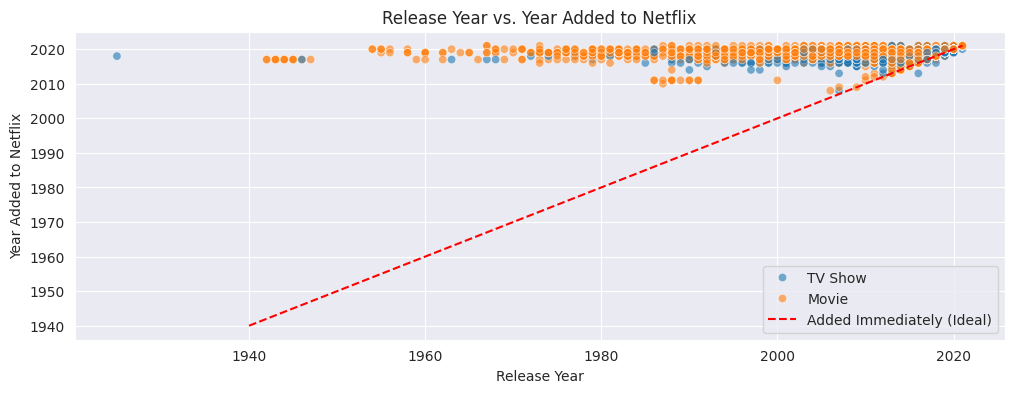

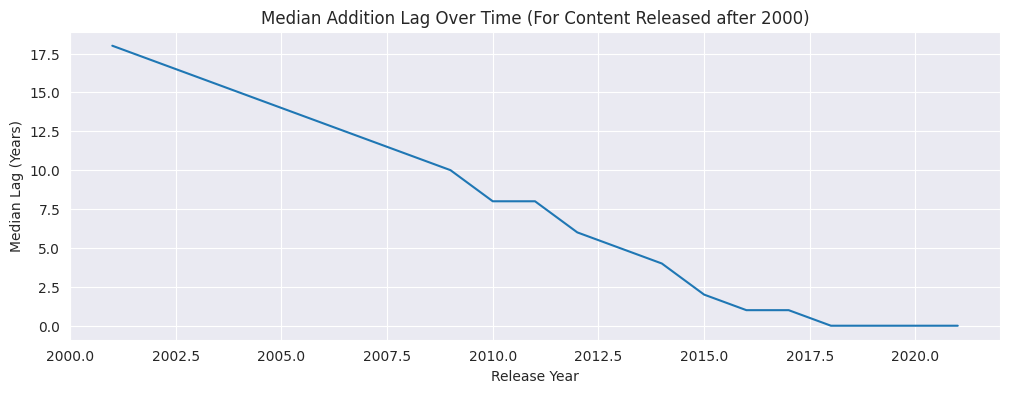

In [55]:
# 1. Create a scatter plot to visualize the relationship
plt.figure(figsize=(12,4))
# Color points by type
sns.scatterplot(data=netflix_df, x='release_year', y='year_added', hue='type', alpha=0.6)
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
# Add a reference line for content added immediately after release
plt.plot([1940, 2021], [1940, 2021], 'r--', label='Added Immediately (Ideal)')
plt.legend()
plt.show()

# 2. Create a new feature: Addition Lag (same as content_age, but for this context)
netflix_df['addition_lag'] = netflix_df['year_added'] - netflix_df['release_year']

# 3. Analyze the average lag over release years
lag_trend = netflix_df[netflix_df['release_year'] > 2000].groupby('release_year')['addition_lag'].median()

plt.figure(figsize=(12, 4))
lag_trend.plot()
plt.title('Median Addition Lag Over Time (For Content Released after 2000)')
plt.xlabel('Release Year')
plt.ylabel('Median Lag (Years)')
plt.show()

Insights & Explanation
The Scatter Plot "Cloud": The scatter plot will show a dense cloud along the red dashed line ("Added Immediately") for content released after ~2013. This represents Netflix's Original content, which is added to the platform at the same time it's released.

The "Long Tail" Below the Line: Points significantly below the line represent older content (e.g., a classic film from the 90s added in 2020). This is the licensed back-catalog.

Decreasing Addition Lag: The line chart of median addition lag will show a steep decline starting around 2013-2014. This is the single most important trend:

Pre-2013: Netflix was primarily a licensing platform. They would add movies and shows years after their theatrical or broadcast release.

Post-2013: With the launch of House of Cards and other Originals, the lag dropped dramatically. Netflix now prioritizes adding content simultaneously with or very soon after its release, fundamentally changing its business model from a content aggregator to a content producer and premier distributor.

4. Most common word pairs or phrases in content descriptions

In [47]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

/tmp/ipython-input-232607373.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


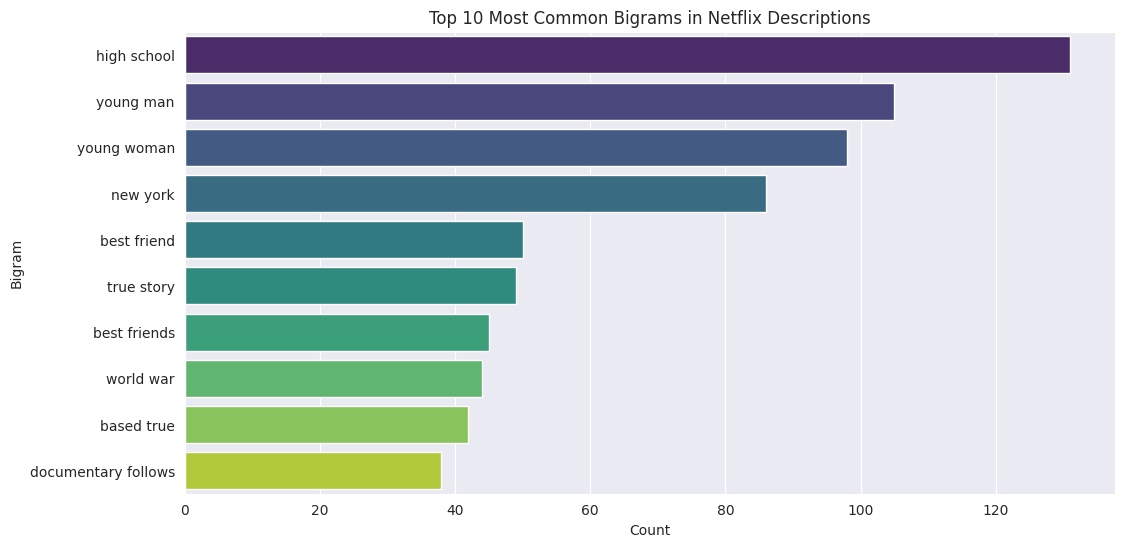

Top 10 Bigrams:
                Bigram  Count
0          high school    131
1            young man    105
2          young woman     98
3             new york     86
4          best friend     50
5           true story     49
6         best friends     45
7            world war     44
8           based true     42
9  documentary follows     38


In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Download NLTK data (run once)
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# 1. Get English stopwords
stop_words = set(stopwords.words('english'))

# 2. Combine all descriptions into one large text
all_descriptions = " ".join(description for description in netflix_df['description'].dropna())

# 3. Tokenize the text and remove stopwords/punctuation
words = word_tokenize(all_descriptions)
words_cleaned = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# 4. Generate bigrams
bigrams_list = list(ngrams(words_cleaned, 2))

# 5. Count the bigrams
bigram_counts = Counter(bigrams_list)

# 6. Get the top 10 most common bigrams
top_bigrams = bigram_counts.most_common(10)

# 7. Plot the results
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')
plt.title('Top 10 Most Common Bigrams in Netflix Descriptions')
plt.xlabel('Count')
plt.show()

print("Top 10 Bigrams:")
print(bigram_df)

Insights & Explanation
Narrative Patterns: The most common bigrams reveal the standard tropes and narrative structures used to describe content.

Expected Bigrams: You will likely see pairs like:

young woman, finds herself, must save, sets out: These suggest coming-of-age stories, journeys, and missions—common plot drivers.

new life, world where, family must: These hint at themes of change, alternate realities, and family dynamics.

documentary series, tv series: Straightforward descriptors of format.

Marketing Language: This analysis uncovers the fundamental building blocks of how Netflix markets its content to users, focusing on relatable characters (young woman), high stakes (must save), and intriguing premises (world where).

5. Who are the top directors on Netflix?

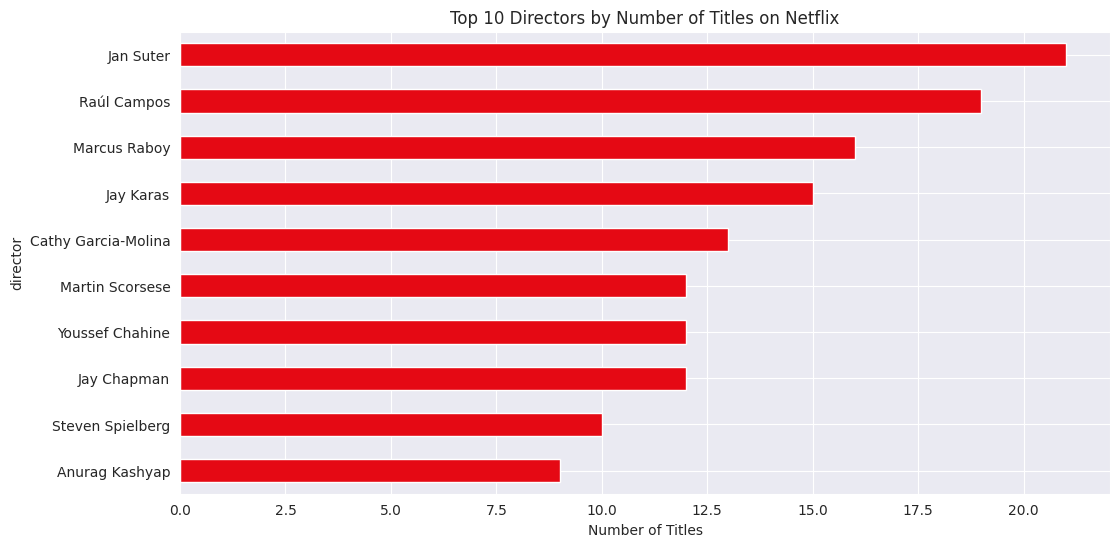

Top 10 Directors on Netflix:
director
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Steven Spielberg       10
Anurag Kashyap          9
Name: count, dtype: int64


In [46]:
# 1. Split the 'director' column for entries with multiple directors
directors_list = netflix_df['director'].dropna().str.split(', ')

# 2. Explode the list to count each director individually
all_directors = directors_list.explode()

# 3. Remove the placeholder 'Unknown' value if it exists
all_directors = all_directors[all_directors != 'Unknown']

# 4. Count the director occurrences
director_counts = all_directors.value_counts()

# 5. Plot the top 10 directors
plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='barh', color='#E50914')
plt.title('Top 10 Directors by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

# 6. Print the top 10 list
print("Top 10 Directors on Netflix:")
print(director_counts.head(10))

Interpretation: This list tells us more about who has a large body of work that Netflix has licensed rather than who the "best" directors are. It highlights the importance of international markets (India) and specific content genres (comedy specials, documentaries) in Netflix's overall library composition. The most popular directors for Netflix Originals (e.g., Duplass brothers, Ava DuVernay) might not appear in the top 10 by pure volume.